We propose EG-ENAS, a new efficient NAS framework based on evolutionary computation, which reuses available pretrained weights and uses proxies and surrogate models to reduce redundant computations. As Search space, we used a subset of the RegNet design space [1].
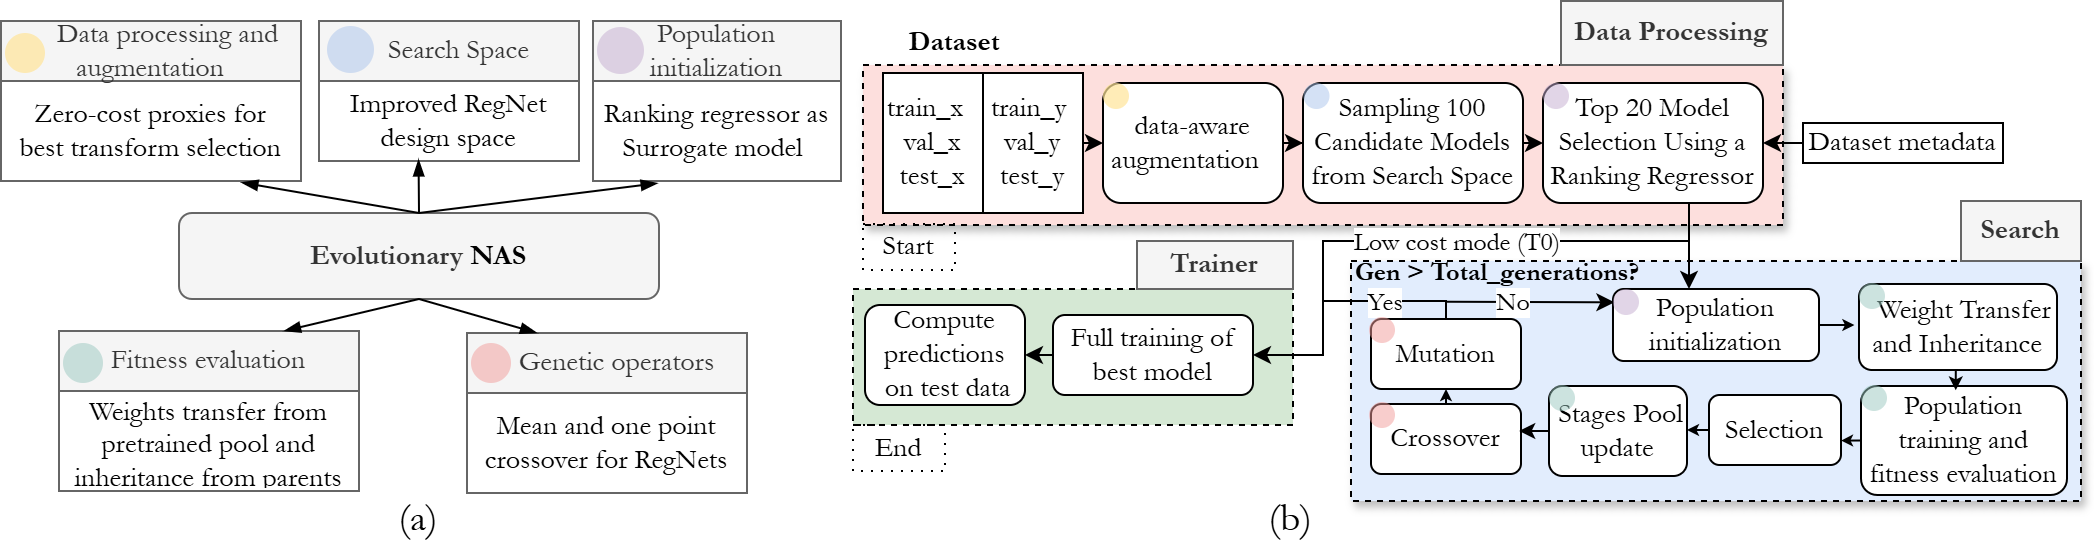

EG-ENAS can be used with a GPU in Colab, primarily for our Low-Cost mode (T0) or for selecting the best augmentation for a dataset using our zero-cost proxy-based augmentation selection method. It is also possible to run population training modes like T3, but it takes between 4 and 8 hours, depending on the dataset. For running modes T4, T6, and T7, downloading our pretrained stages pool is required. We recommend starting with T0, T0+, or T3 modes for testing.

## Installation

In [50]:
!git clone https://github.com/ankilab/EG-ENAS.git

Cloning into 'EG-ENAS'...
remote: Enumerating objects: 2471, done.
remote: Counting objects: 100% (487/487), done.
remote: Compressing objects: 100% (324/324), done.
remote: Total 2471 (delta 201), reused 406 (delta 140), pack-reused 1984 (from 1)
Receiving objects: 100% (2471/2471), 229.60 MiB | 26.79 MiB/s, done.
Resolving deltas: 100% (1296/1296), done.
Filtering content: 100% (9/9), 674.67 MiB | 52.75 MiB/s, done.


In [51]:
%cd EG-ENAS
!pip install -r requirements.txt -q

/content/EG-ENAS
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


## Datasets
As a default example, we include the [Sokoto dataset](https://data.ncl.ac.uk/articles/dataset/Sudoku_Dataset/26976121/1) [2], which is small, novel, and was used in the NAS Unseen Data Challenge 2024.

If you want to test your own dataset, it should have its own subfolder within the **datasets** directory, containing the following files. For reference, see examples in the  [NAS Unseen Data Challenge](https://github.com/Towers-D/NAS-Unseen-Datasets) [3]:

- `metadata`
- `test_x.npy`
- `test_y.npy`
- `train_x.npy`
- `train_y.npy`
- `valid_x.npy`
- `valid_y.npy`

The `metadata` file should be a dictionary with the following fields. Here’s an example from the **AddNIST** dataset [4]:

```json
{
  "num_classes": 20,
  "input_shape": [50000, 3, 28, 28],
  "codename": "Adaline",
  "benchmark": 89.850
}
```

## Pretrained pool
For modes T4, T6, and T7, we use a weight transfer strategy for our RegNet search space from a pretrained pool of weights. This helps to boost the population training process. However, the pretrained pool weighs 54GB and can be downloaded here. The files and folders inside it must be placed in the *pretrained_pool* folder. The current file *pretrained_pool/df_blocks_pool.csv* contains only the information and metadata of the model weights and their locations but not the weights themselves.

We recommend starting the initial tests with the low-cost (T0) and T3 modes that don't require the pretrained weights.


## Test modes
As we assume that the information of the dataset is not known in advance, we must select the most suitable augmentation for each specific dataset, since the same augmentations do not fit all datasets. We propose a method that uses zero-cost proxies to evaluate multiple candidate augmentations (located in the **configs/augmentations** folder) and find an optimal augmentation for that specific dataset in just a few minutes.

We also include different strategies to reduce training time, such as a Ranking Regressor for population initialization, weights transfer and inheritance, and evolutionary search.

We have created several scripts that include the ablation studies conducted for our paper. The names of the tests combine **(Mode + AugmentationStrategy)** and include a "**+**" if the extended search space (large search space) is used. Below is a description of each mode and augmentation selection strategy.

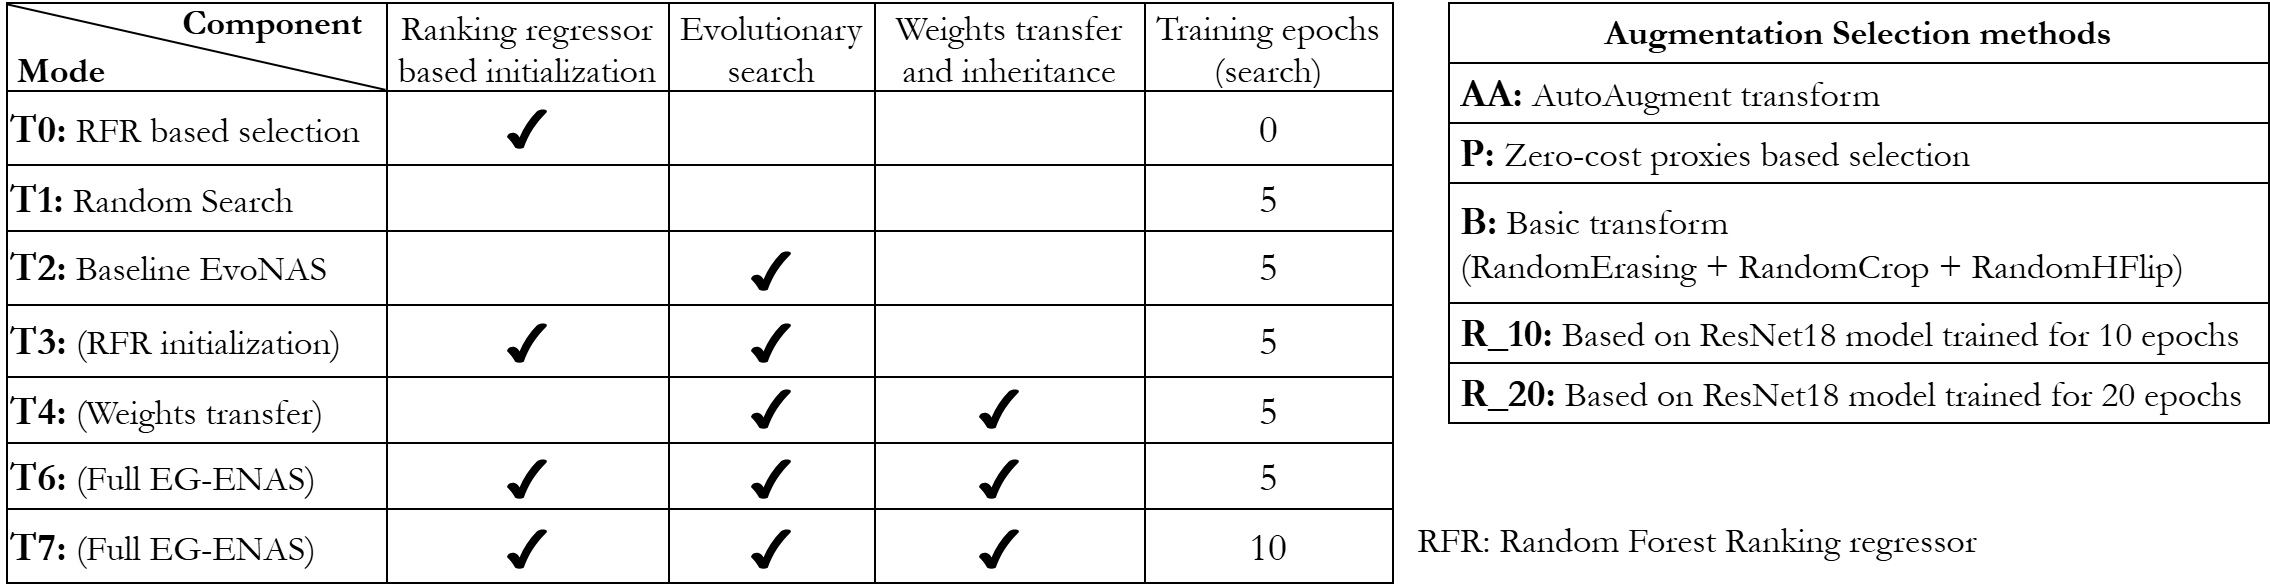

## Reproducibility
The base scripts for running experiments are located in the `scripts` folder and are named after each mode. For example, to reproduce T0 with proxy-based (P) augmentation selection **(T0_P)** for validation datasets (Table 3 in the paper), follow these steps:

1. Download [LaMelo](data.ncl.ac.uk/articles/dataset/Language_Dataset/24574729), [Gutenberg](data.ncl.ac.uk/articles/dataset/Gutenberg_Dataset/24574753), [Adaline](data.ncl.ac.uk/articles/dataset/AddNIST_Dataset/24574354), [Chester](data.ncl.ac.uk/articles/dataset/Chesseract_Dataset/24118743), [Sadie](data.ncl.ac.uk/articles/dataset/GeoClassing_Dataset/24050256), [Mateo](data.ncl.ac.uk/articles/dataset/MultNIST_Dataset/24574678), [Caitie](data.ncl.ac.uk/articles/dataset/CIFARTile_Dataset/24551539) datasets and save each one in subfolder inside **datasets**. Delete any other folder or dataset inside **datasets** folder.

2. Then run the script directly:



In [ ]:
!bash ./scripts/T0_P.sh

## Results interpretation
The test will copy the necessary functions and run in **EGENAS_RESULTS** folder inside EG-ENAS.

- Results will be shown inline an will also be saved in the **EGENAS_RESULTS/evaluation** folder.
-The best selected augmentation will be saved in **EGENAS_RESULTS/augmentation_tests**

If you want a more advanced mode like **T3** that uses evolutionary NAS and trains and evaluate 3 generations of 20 individuals, run the following script (will take 4-5 hours):



In [ ]:
!bash ./scripts/T3_P.sh

All tests are run using seed 1. Inside the scripts you can modify it, as well as the other following parameters:

- **`save_folder`**: Path to the folder where trained models and results will be saved.
- **`mode`**: Specifies the EG-ENAS mode, ranging from `T0` to `T7`.
- **`augment`**: Augmentation selection method to use (e.g., AA, P, B, etc.).
- **`seed`**: Seed value (an integer or `None` if not used).

### Augmentation selection
If you just want to run the data_processing module and evaluate which is the best augmentation method for your dataset, you have to run the following script:

In [ ]:
!bash ./scripts/get_augmentations_rank.sh

## References



*   [1] Ilija Radosavovic, Raj Prateek Kosaraju, Ross Girshick, Kaiming He, and Piotr Dollár. Designing network design spaces, 2020.
*   [2] David Towers, Linus Ericsson, Amir Atapour-Abarghouei, Andrew Stephen McGough, and Elliot J Crowley. Sudoku Dataset, 9 2024.
*   [3] Rob Geada, David Towers, Matthew Forshaw, Amir Atapour-Abarghouei, and A. Stephen
McGough. Insights from the use of previously unseen neural architecture search datasets, 2024.
*   [4] David Towers, Rob Geada, Amir Atapour-Abarghouei, and Andrew Stephen McGough. AddNIST Dataset, 11 2023.
